### **Imports and initialization**

In [2]:
import numpy as np

from TurtleControllers import TurtlebotController
from TurtleVision import TurtlebotVision
from TurtleICP import TurtlebotICP
from TurtleUtils import show_img, plot_data, robot2plt, plot_fitted_garage, plt2robot, transform_points

from robolab_turtlebot import Turtlebot
turtle = Turtlebot(rgb = True, pc = True)
turtle_vision = TurtlebotVision(turtle)
turtle_icp = TurtlebotICP()

#### **Sample garage and fit garage model**

In [3]:
sampled_points = turtle_vision.sample_garage(color = "yellow",
                        sampling_step = 20, r2p = True)
sampled_points_np = np.array(sampled_points).T
plot_data([sampled_points_np], ["Garage sampled"])

print(sampled_points_np.shape)
print(np.any(np.isnan(sampled_points_np)))

for i in range(sampled_points_np.shape[1]):
    print(sampled_points_np[:,i])

NameError: name 'turtle_vision' is not defined

In [10]:
result = turtle_icp.optimize(sampled_points_np)
result.animate_results()

ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
plot_fitted_garage(result.garage, sampled_points_np)

NameError: name 'result' is not defined

#### **Retrieve garage object**

In [25]:
turtle_controller = TurtlebotController(turtle, rate = 40)
turtle_controller.reset_odometry()

garage = result.garage

pt, idx = garage.closest_waypoint(turtle_controller.get_odometry())
turtle_controller.move_to(pt)
turtle_controller.face_towards(plt2robot([garage.waypoints[:,0]])[0], relative = False)

In [26]:
sampled_points2 = turtle_vision.sample_garage(color = "yellow",
                        sampling_step = 20, r2p = True)
sampled_points2 = transform_points(sampled_points2, *turtle_controller.get_odometry())
sampled_points_np2 = np.array(sampled_points).T

sampled_points_np = np.hstack((sampled_points_np, sampled_points_np2))
print(sampled_points_np.shape)

(2, 42)


/home.nfs/jonjaku1/lar/22_3_2023/lar/folder/TurtleVision.py:48: RuntimeWarning: Mean of empty slice
  column_mean = np.nanmean(depth_image_strip, axis=0)


In [27]:
result = turtle_icp.optimize(sampled_points_np)
result.animate_results()

Filtered 0 points
[]
Optimizing ... Angle 0
Angle 60
Angle -60
Angle 120
Angle -120
Done
Optimization time: 7.00 s


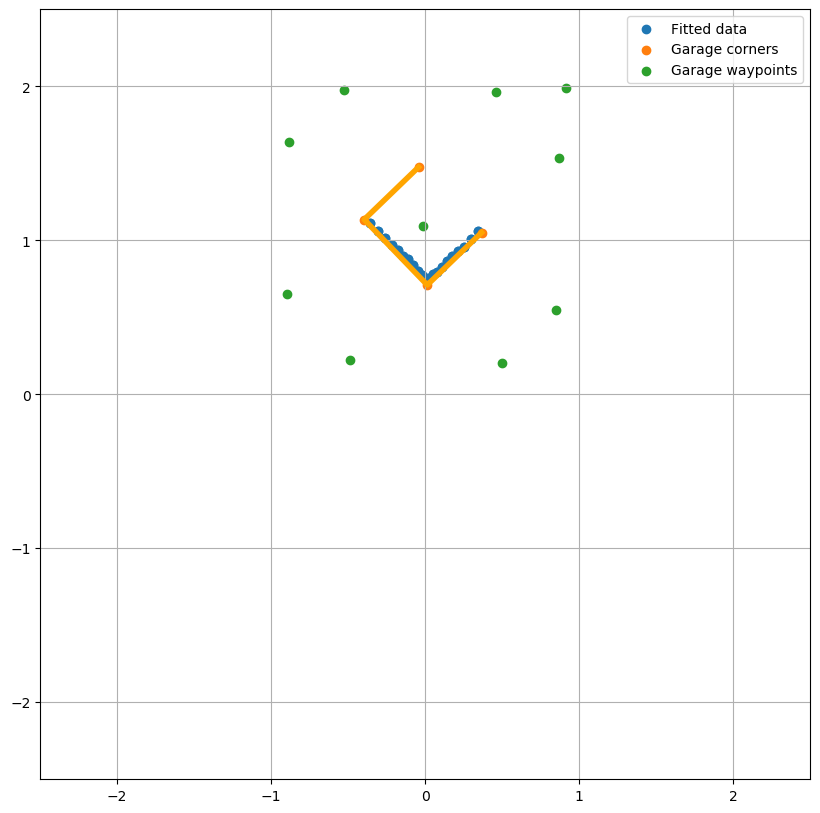

In [28]:
plot_fitted_garage(result.garage, sampled_points_np)

In [29]:
garage = result.garage

pt, idx = garage.closest_waypoint(turtle_controller.get_odometry())
while idx != 1:
    turtle_controller.move_to(pt)
    pt, idx, _ = garage.closest_waypoint(idx)

In [30]:
pt, idx, _ = garage.closest_waypoint(idx)

KeyError: 1

shutdown request: [/turtlenode] Reason: new node registered with same name
